# Exploratory Data Analysis (EDA) - FER-2013 Emotion Dataset


## Setup and Data Loading


In [11]:
import os
import random
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Configuration
BASE_DIR = Path("../../data/raw/fer2013")  # Adjust this path if needed
TRAIN_DIR = BASE_DIR / "train"
TEST_DIR = BASE_DIR / "test"
SELECTED_CLASSES = ["angry", "happy", "sad", "surprise", "neutral"]
DROPPED_CLASSES = ["fear", "disgust"]

## Dataset Summary

In [12]:
def count_images(directory):
    counts = {}
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            counts[emotion] = len(os.listdir(emotion_path))
    return counts

train_counts = count_images(TRAIN_DIR)
test_counts = count_images(TEST_DIR)

df_train = pd.DataFrame(list(train_counts.items()), columns=["Emotion", "Train Images"])
df_test = pd.DataFrame(list(test_counts.items()), columns=["Emotion", "Test Images"])
df_summary = pd.merge(df_train, df_test, on="Emotion", how="outer").fillna(0)
print(df_summary)

    Emotion  Train Images  Test Images
0     angry          3995          958
1   disgust           436          111
2      fear          4097         1024
3     happy          7215         1774
4   neutral          4965         1233
5       sad          4830         1247
6  surprise          3171          831


## Class Distribution Visualization

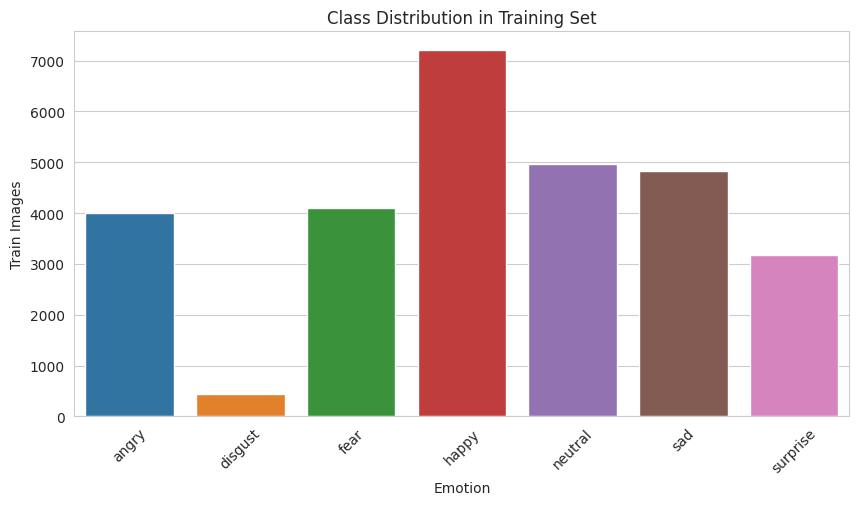

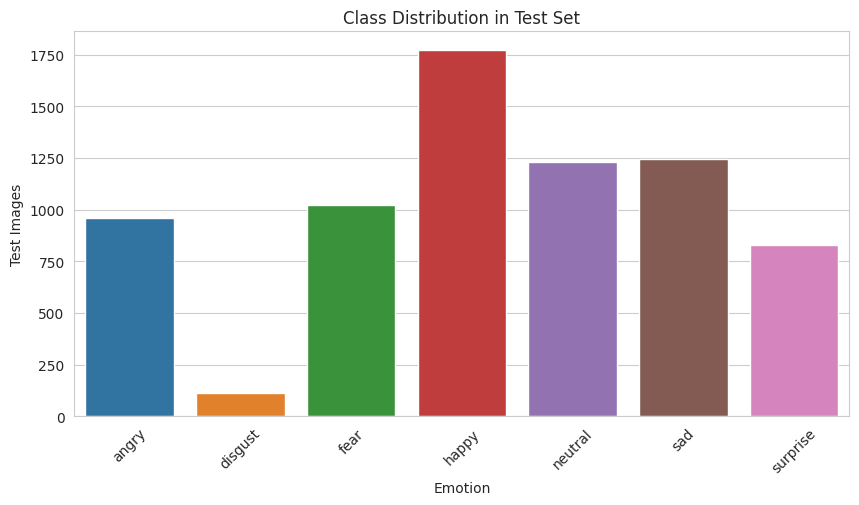

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x="Emotion", y="Train Images", data=df_summary)
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Emotion", y="Test Images", data=df_summary)
plt.title("Class Distribution in Test Set")
plt.xticks(rotation=45)
plt.show()


## Pixel Intensity Analysis

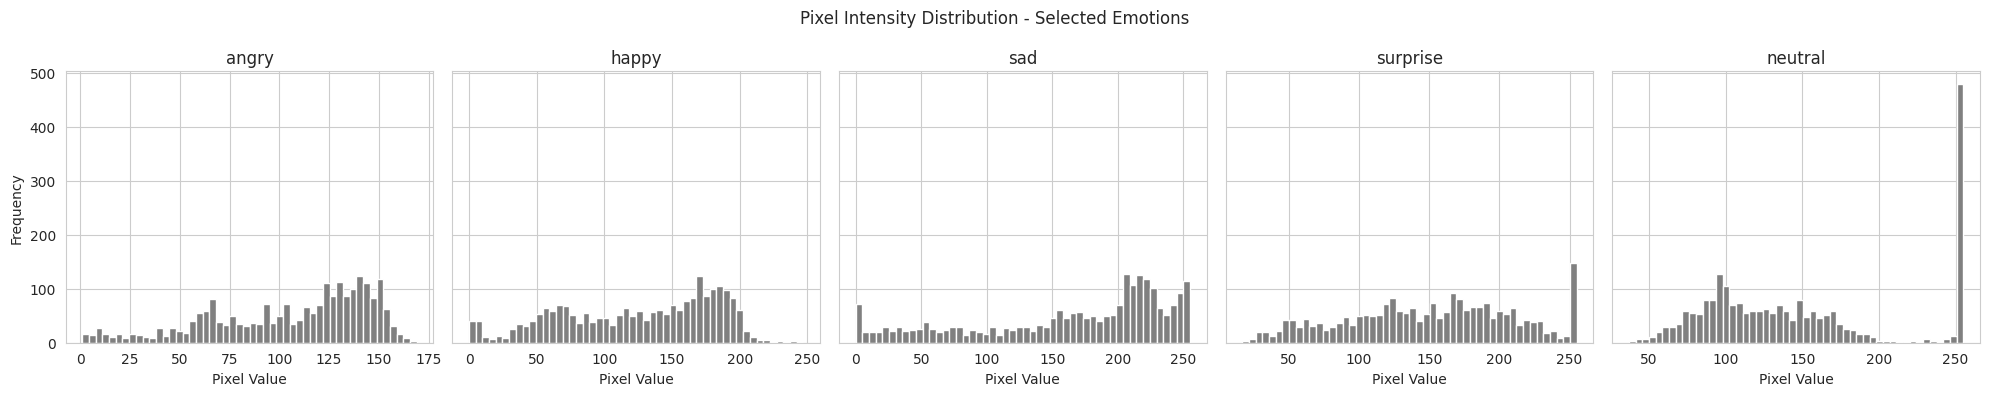

In [33]:
fig, axes = plt.subplots(1, len(SELECTED_CLASSES), figsize=(20, 4), sharey=True)
for idx, emotion in enumerate(SELECTED_CLASSES):
    emotion_dir = TRAIN_DIR / emotion
    img_name = random.choice(os.listdir(emotion_dir))
    img_path = emotion_dir / img_name
    img = np.array(Image.open(img_path))
    axes[idx].hist(img.flatten(), bins=50, color='gray')
    axes[idx].set_title(emotion)
    axes[idx].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")
fig.suptitle("Pixel Intensity Distribution - Selected Emotions")
plt.tight_layout()
plt.show()


## Image- Level Statistics

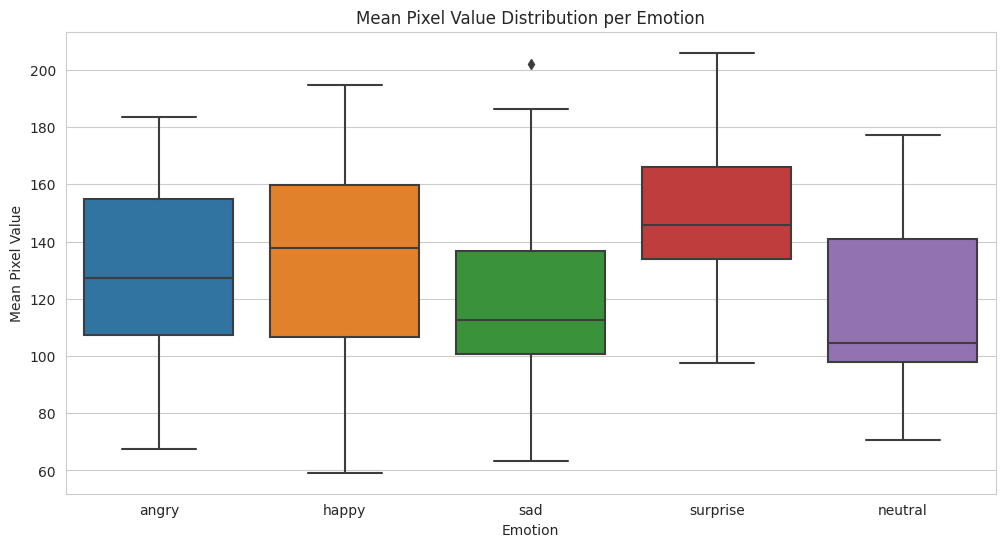

In [15]:
means = []
stds = []
labels = []

for emotion in SELECTED_CLASSES:
    emotion_dir = TRAIN_DIR / emotion
    sample_files = random.sample(os.listdir(emotion_dir), min(20, len(os.listdir(emotion_dir))))
    for img_name in sample_files:
        img_path = emotion_dir / img_name
        img = np.array(Image.open(img_path))
        means.append(img.mean())
        stds.append(img.std())
        labels.append(emotion)

stats_df = pd.DataFrame({"Emotion": labels, "Mean Pixel Value": means, "Std Pixel Value": stds})
plt.figure(figsize=(12,6))
sns.boxplot(x="Emotion", y="Mean Pixel Value", data=stats_df)
plt.title("Mean Pixel Value Distribution per Emotion")
plt.show()

In [ ]:
## sample Image Grids

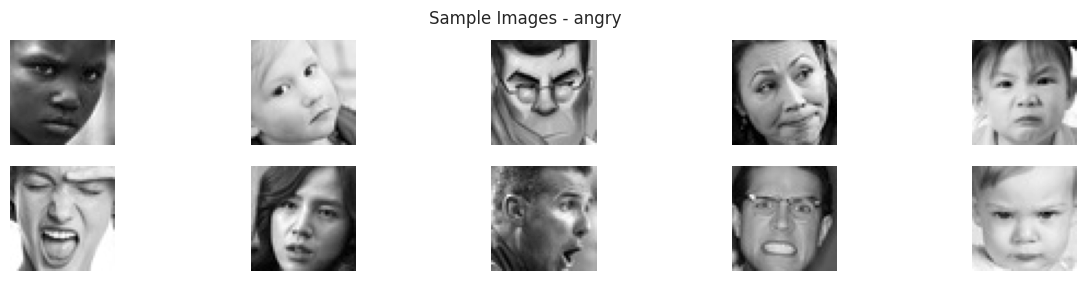

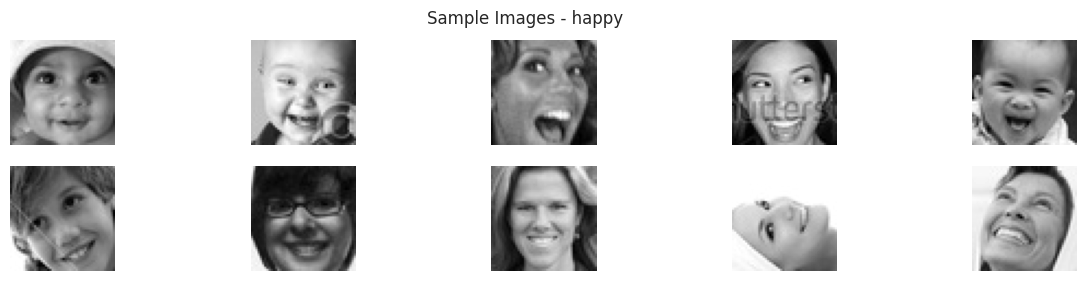

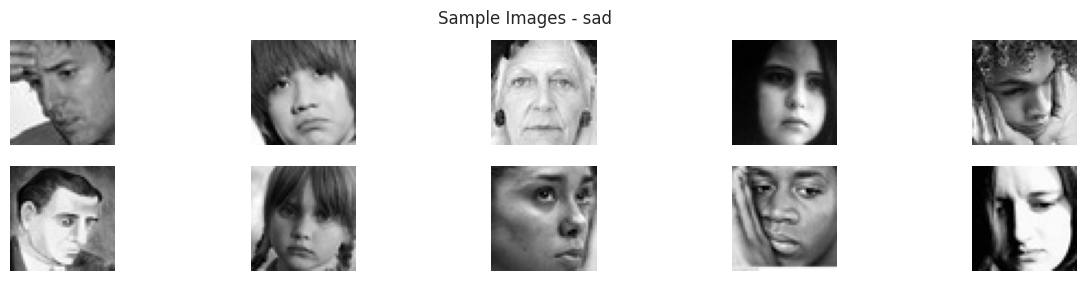

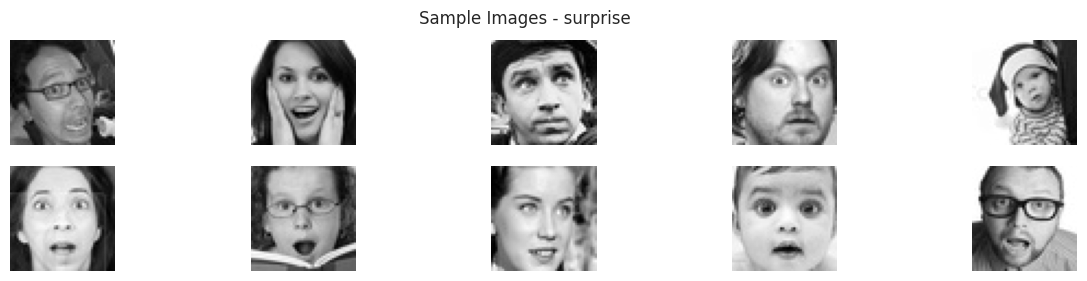

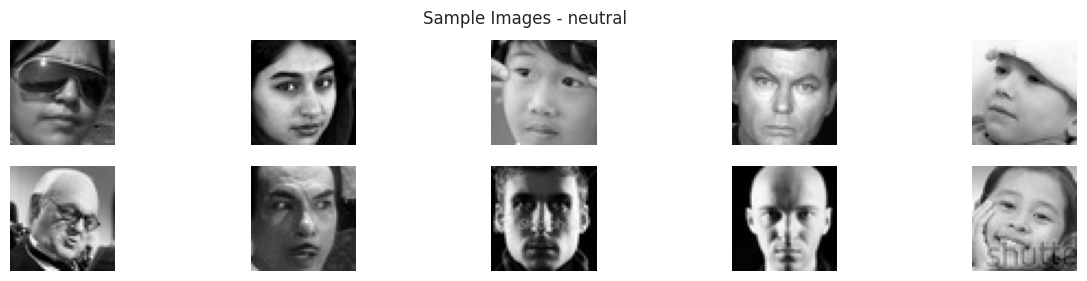

In [30]:
def plot_sample_grid(emotion):
    emotion_dir = TRAIN_DIR / emotion
    sample_files = random.sample(os.listdir(emotion_dir), min(10, len(os.listdir(emotion_dir))))
    plt.figure(figsize=(15,3))
    for i, img_name in enumerate(sample_files):
        img_path = emotion_dir / img_name
        img = np.array(Image.open(img_path))
        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Sample Images - {emotion}")
    plt.show()

for emotion in SELECTED_CLASSES:
    plot_sample_grid(emotion)
    

## Conclusions from EDA

In [31]:
eda_summary = {
    "Class Counts": df_summary,
    "Class Removal Reasoning": {
        "Dropped Classes": DROPPED_CLASSES,
        "Reasons": [
            "- Fewer samples compared to other emotions.",
            "- Less relevant for music recommendation purposes."
        ]
    },
    "Image Quality Observations": [
        "- All images are 48x48 grayscale as expected.",
        "- Pixel value distribution is within normal range for all selected classes."
    ],
    "Action Points": [
        "- Normalize pixel values during preprocessing (e.g., rescale to 0–1 range).",
        "- Ensure balanced sampling if necessary."
    ]
}

print("\n--- EDA Summary ---")
for key, value in eda_summary.items():
    print(f"\n{key}:")
    print(value)


--- EDA Summary ---

Class Counts:
    Emotion  Train Images  Test Images
0     angry          3995          958
1   disgust           436          111
2      fear          4097         1024
3     happy          7215         1774
4   neutral          4965         1233
5       sad          4830         1247
6  surprise          3171          831

Class Removal Reasoning:
{'Dropped Classes': ['fear', 'disgust'], 'Reasons': ['- Fewer samples compared to other emotions.', '- Less relevant for music recommendation purposes.']}

Image Quality Observations:
['- All images are 48x48 grayscale as expected.', '- Pixel value distribution is within normal range for all selected classes.']

Action Points:
['- Normalize pixel values during preprocessing (e.g., rescale to 0–1 range).', '- Ensure balanced sampling if necessary.']
